In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## **DATA PREPROCESSING**

In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 11
Numerical feature are:
 {'Age', 'EstimatedSalary', 'Exited', 'NumOfProducts', 'IsActiveMember', 'Tenure', 'CreditScore', 'CustomerId', 'Balance', 'RowNumber', 'HasCrCard'}


In [ ]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 3
Categorical feature are:
 {'Gender', 'Geography', 'Surname'}


### **In this dataset there is no null values, so we dont want to perform Handling missing values. Only perform the Feature Encoding techiniques to convert the categorical feature into numerical feature**

In [ ]:
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### **Customer ID**:Customer ID is typically dropped from the modeling process. Customer ID is a unique identifier and doesn't provide meaningful information for predicting churn.

###**Customer Name**:Customer name is usually dropped as well. Similar to the customer ID, the name is unlikely to have predictive power in churn prediction.

In [ ]:
data.drop(columns=['CustomerId'], inplace=True)
data.drop(columns=['Surname'], inplace=True)

##  **ExploratoryData Analysis (EDA)**





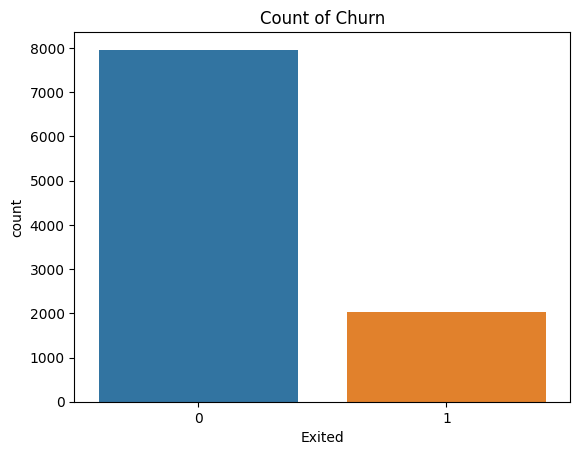

In [ ]:
# plotting with target feature
sns.countplot(data=data, x='Exited')
plt.title('Count of Churn')
plt.show()

In [ ]:
l1 = data.loc[data['Exited']== 1].count()[0]
print(f"Pecentage of Left: {l1/len(data['Exited'])}")
print(data.Exited.value_counts())

Pecentage of Left: 0.2037
0    7963
1    2037
Name: Exited, dtype: int64


*Customer are left about 20.37 percentage from overall, this like a imbalance dataset*

In [ ]:
# How many amount loss from customer churn
loss = []
for values in data.loc[data['Exited'] == 1, 'Balance']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

185588095.0


*We have lost arround $185588095.0 due to customer churn*

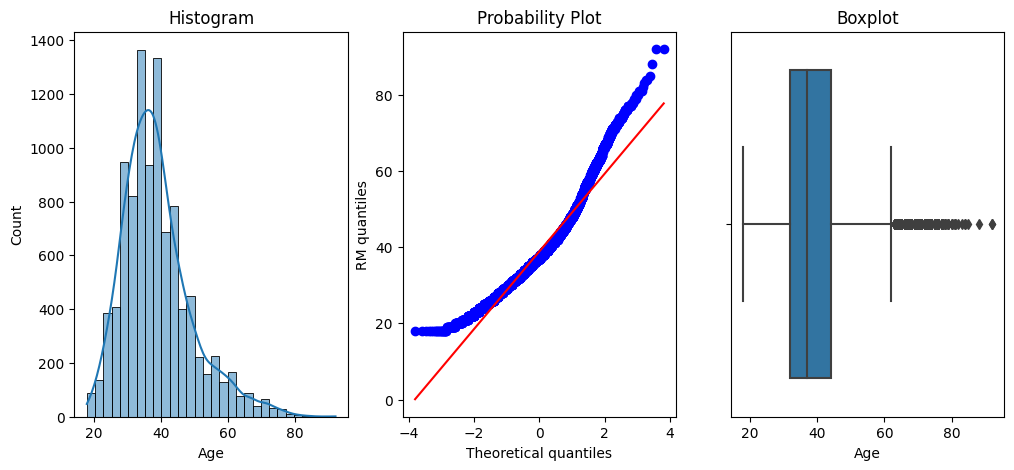

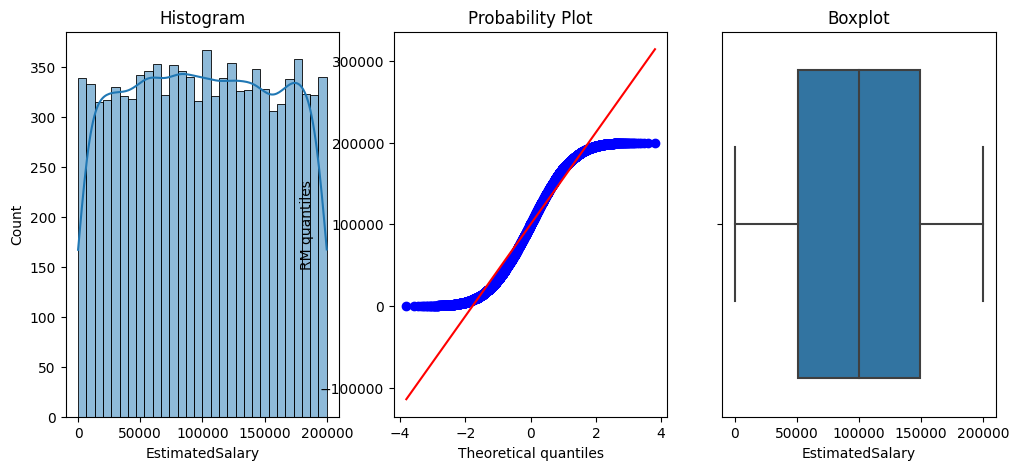

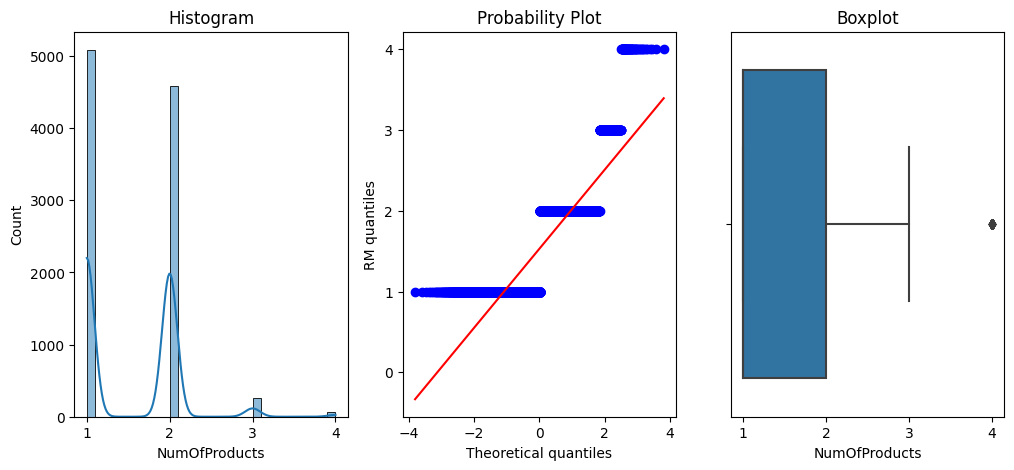

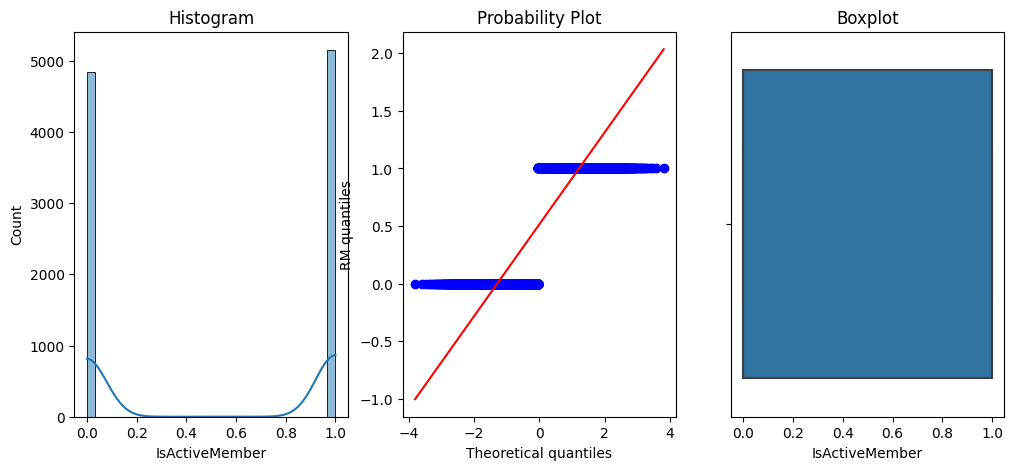

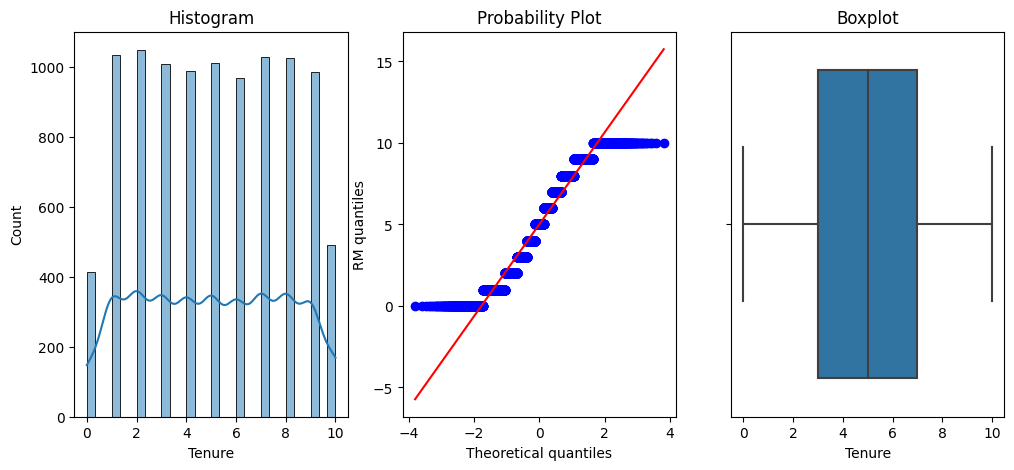

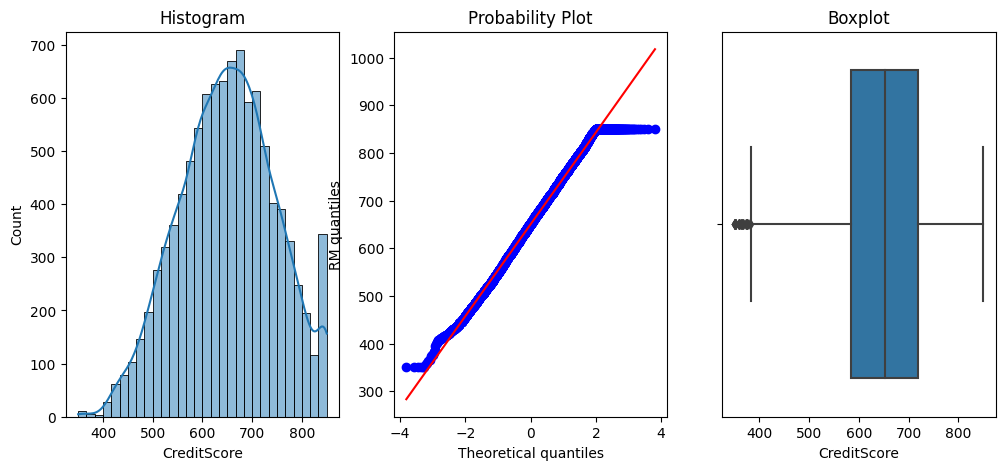

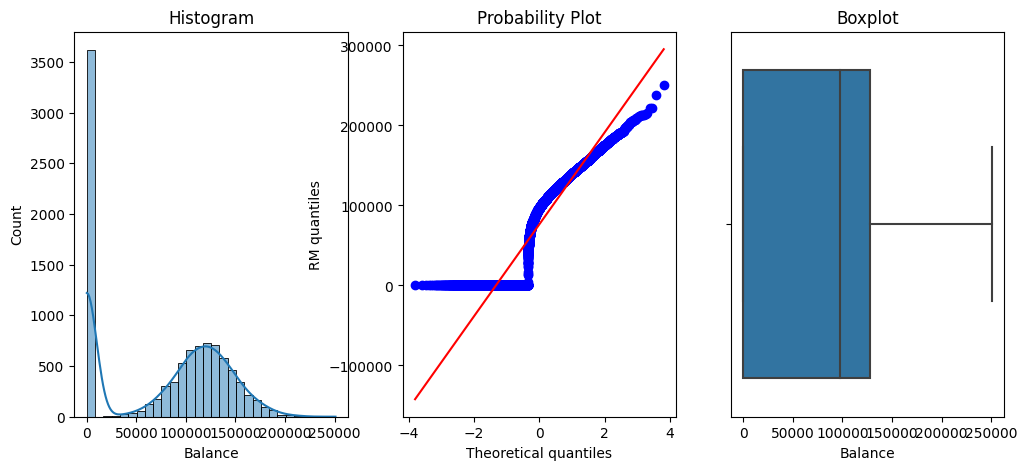

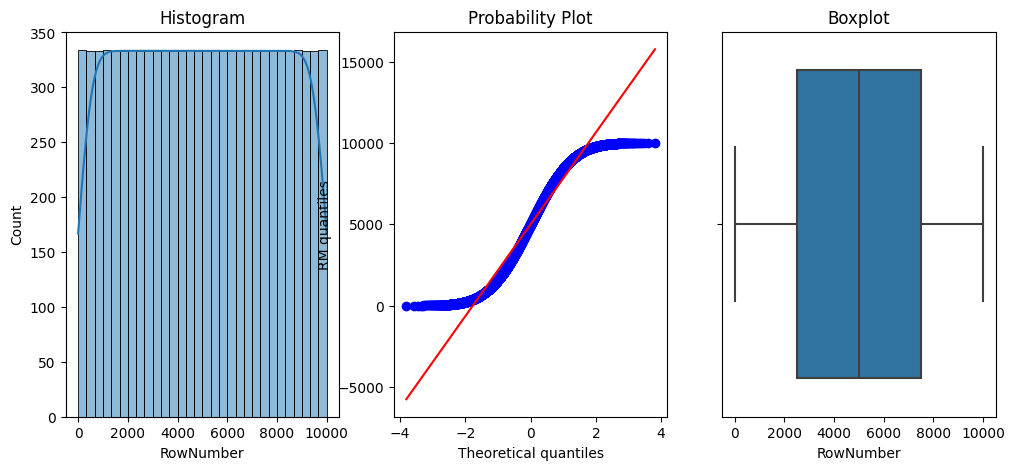

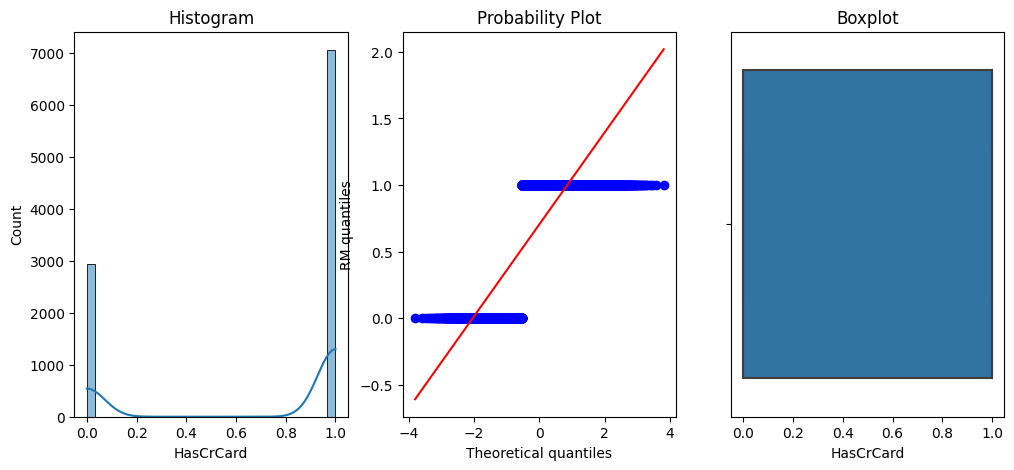

In [ ]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
  if feature != 'Exited':
    if feature != 'CustomerId':

      plt.figure(figsize=(12,5))

      plt.subplot(1, 3, 1)
      sns.histplot(data=data, x=feature, bins=30, kde=True)
      plt.title('Histogram')

      plt.subplot(1, 3, 2)
      stats.probplot(data[feature], dist="norm", plot=plt)
      plt.ylabel('RM quantiles')

      plt.subplot(1, 3, 3)
      sns.boxplot(x=data[feature])
      plt.title('Boxplot')

plt.show()

## **Correlation Analysis**

<Axes: >

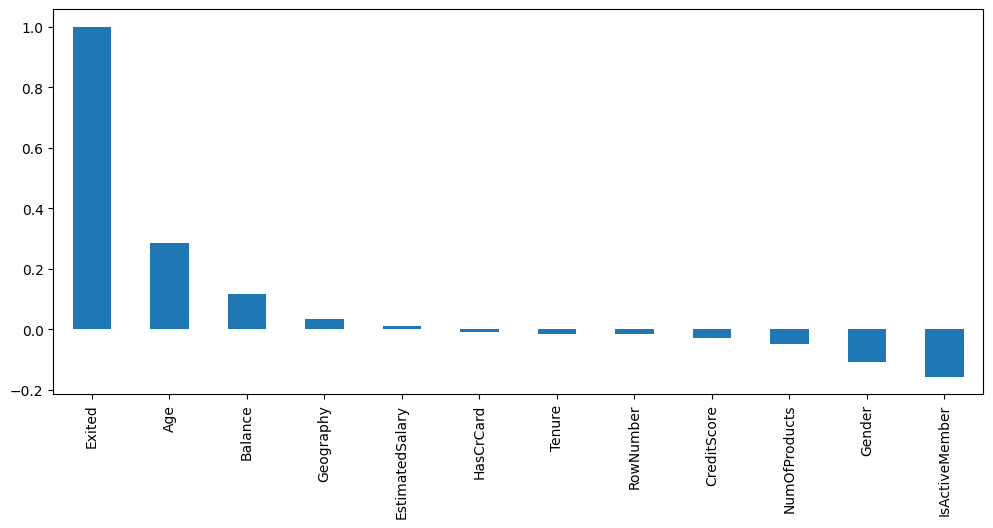

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,5))
data.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
data

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

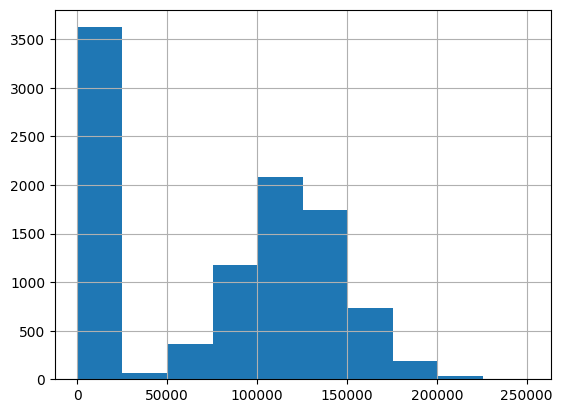

In [ ]:
data.Balance.hist()

<Axes: >

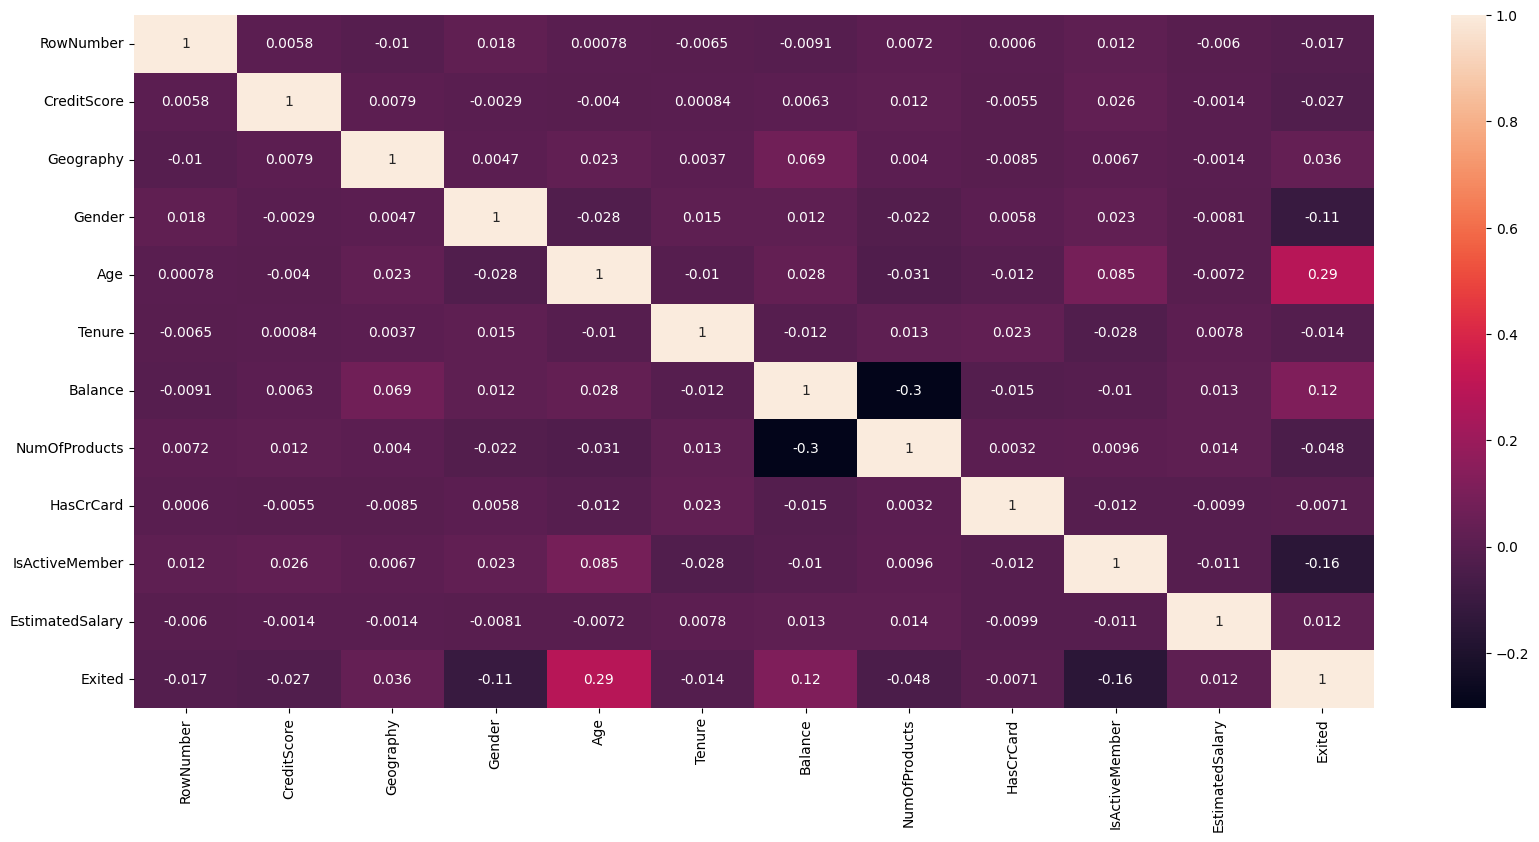

In [ ]:
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

## **Customer Churn Analysis**

Churn rate: 20.37%


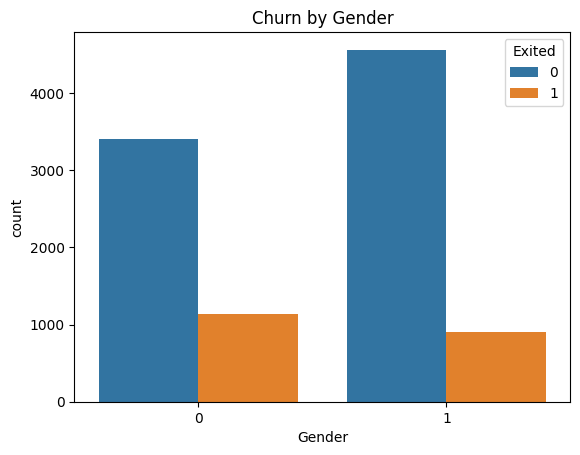

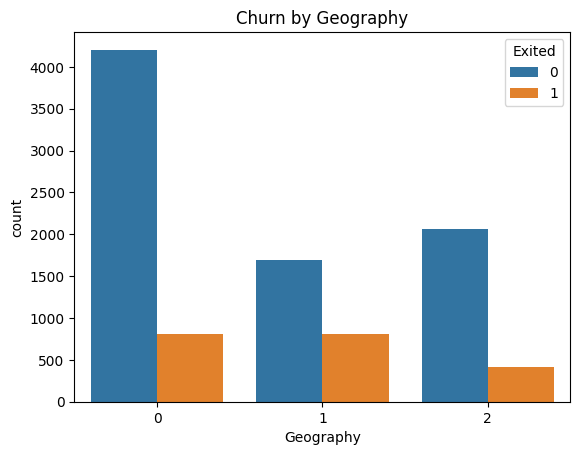

"# Churn by numeric variables (boxplot)\nsns.boxplot(data=data, x='Balance', y='Exited')\nplt.show()\n"

In [ ]:
# Churn rate
churn_rate = data['Exited'].mean()
print(f'Churn rate: {churn_rate:.2%}')

# Churn by categorical variables
categorical_variables = ['Gender', 'Geography']

for cat_var in categorical_variables:
    sns.countplot(data=data, x=cat_var, hue='Exited')
    plt.title(f'Churn by {cat_var}')
    plt.show()


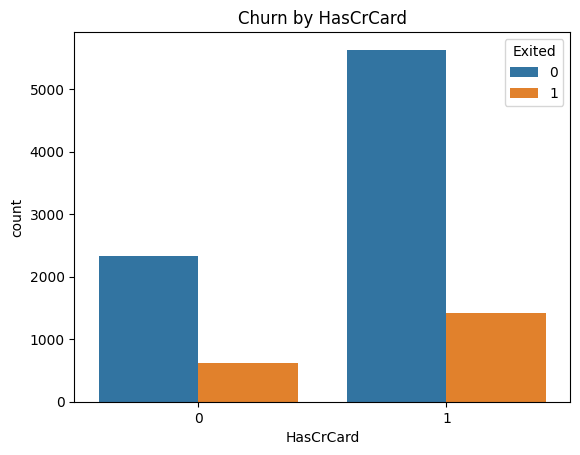

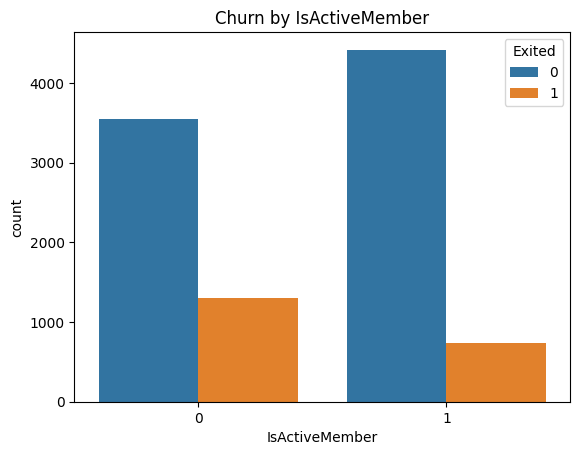

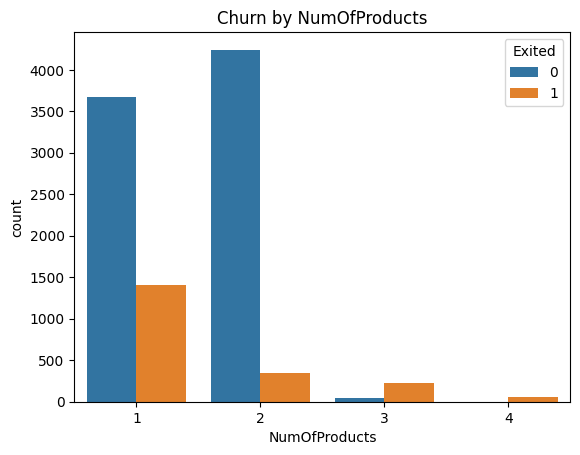

In [ ]:
# Churn by numeric variables
numerical_variables = ['HasCrCard', 'IsActiveMember', 'NumOfProducts']

for num_var in numerical_variables:
    sns.countplot(data=data, x=num_var, hue='Exited')
    plt.title(f'Churn by {num_var}')
    plt.show()